In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({
    'axes.titlesize': 14,    # Font size for plot titles
    'axes.labelsize': 12,    # Font size for x and y labels
    'xtick.labelsize': 10,   # Font size for x tick labels
    'ytick.labelsize': 10,   # Font size for y tick labels
    'legend.fontsize': 12,   # Font size for the legend
    'font.size': 12     ,     # Default font size
    'font.family': 'serif',
})

# plt.savefig(r'file.png', dpi=800,pad_inches=0.2, bbox_inches='tight')


## Hyperparameter Tuning

In [2]:
path = r'E:\Thesis\outputs\00_charts\tuning.csv'

In [3]:
df = pd.read_csv(path)
df

,jobid,fixed,hyperparameter,value,fold_0_iou,fold_1_iou,fold_2_iou,stddev_val_iou,avg_val_iou
0,45215,"lr=0.00005, gamma=0.95",Batch size,4.00000,0.3627,0.3634,0.3648,0.0011,0.3636
1,45216,"lr=0.00005, gamma=0.95",Batch size,8.00000,0.385,0.3734,0.4041,0.0155,0.3875
2,45217,"lr=0.00005, gamma=0.95",Batch size,16.00000,0.3851,0.3950,0.4099,0.0125,0.3967
3,45218,"lr=0.00005, gamma=0.95",Batch size,32.00000,oom error,NaN,NaN,NaN,NaN
4,same as 45217,"batch size = 16, gamma=0.95",LR,0.00005,0.385,0.3734,0.4041,0.0155,0.3875
5,45219,"batch size = 16, gamma=0.95",LR,0.00010,0.3779,0.4066,0.4066,0.0166,0.3970
6,45220,"batch size = 16, gamma=0.95",LR,0.00050,0.3461,0.3807,0.4006,0.0276,0.3758
7,45221,"batch size = 16, lr =0.0001",Gamma,0.88000,0.3739,0.3672,0.4079,0.0218,0.3830
8,45222,"batch size = 16, lr =0.0001",Gamma,0.92000,0.3919,0.3884,0.4070,0.0099,0.3958
9,same as 45219,"batch size = 16, lr =0.0001",Gamma,0.95000,0.3779,0.4066,0.4066,0.0166,0.3970


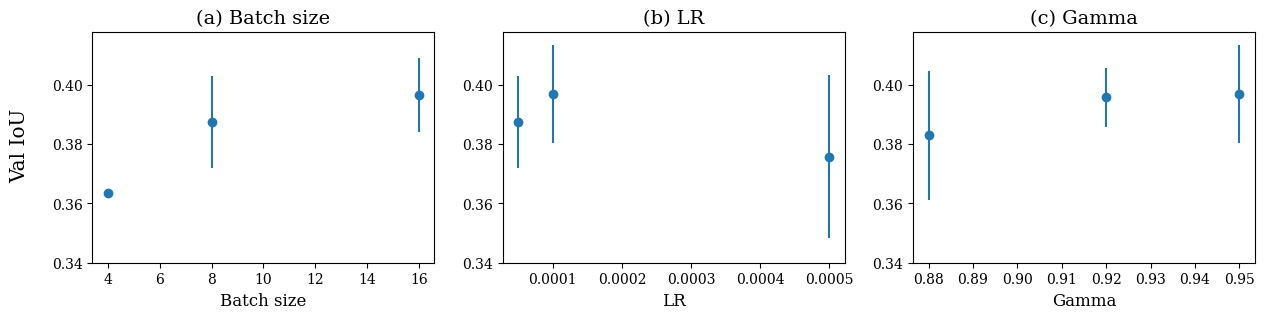

In [5]:
# 3 horizontal plots showing tuning for batch size, LR and Gamma
fig, axs = plt.subplots(1,3, figsize=(15, 3))
# set font ticks and labels

colors = ['red', 'blue', 'green']
hyperparameters = ['Batch size', 'LR', 'Gamma']
numbering = ['(a)', '(b)', '(c)']
df= df.dropna()
for i, j in enumerate(hyperparameters):       
    subset = df[df['hyperparameter'] == j]
    axs[i].errorbar(subset['value'], subset['avg_val_iou'], yerr=subset['stddev_val_iou'], fmt='o')
    axs[i].set_title(f'{numbering[i]} {j}')
    axs[i].set_xlabel(j)
    axs[i].set_yticks(np.arange(0.34,0.42,0.02))
    axs[i].set_ylim(0.34,0.418)
fig.supylabel('Val IoU', y=0.5, x=0.07)
plt.savefig(r'E:\Thesis\outputs\00_charts\plots\results_0_tuning.png', dpi=800,pad_inches=0.2, bbox_inches='tight')
plt.show()


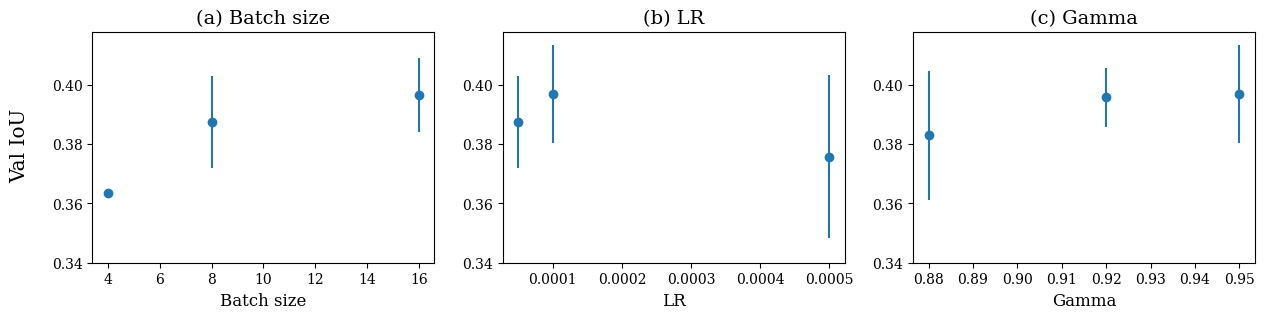

In [4]:
# 3 horizontal plots showing tuning for batch size, LR and Gamma
fig, axs = plt.subplots(1,3, figsize=(15, 3))
# set font ticks and labels

colors = ['red', 'blue', 'green']
hyperparameters = ['Batch size', 'LR', 'Gamma']
numbering = ['(a)', '(b)', '(c)']
df= df.dropna()
for i, j in enumerate(hyperparameters):       
    subset = df[df['hyperparameter'] == j]
    axs[i].errorbar(subset['value'], subset['avg_val_iou'], yerr=subset['stddev_val_iou'], fmt='o')
    axs[i].set_title(f'{numbering[i]} {j}')
    axs[i].set_xlabel(j)
    axs[i].set_yticks(np.arange(0.34,0.42,0.02))
    axs[i].set_ylim(0.34,0.418)
fig.supylabel('Val IoU', y=0.5, x=0.07)
plt.savefig(r'E:\Thesis\outputs\00_charts\plots_transparent\results_0_tuning.png', dpi=800,pad_inches=0.2, bbox_inches='tight', transparent=True)
plt.show()


#### Model parameters count

In [3]:
import torch
import segmentation_models_pytorch as smp
# import torch model summary
from torchsummary import summary

# create a model
model = smp.Unet('resnet50', encoder_weights=None, in_channels=10,classes=11, activation=None)
# print the model summary
summary(model, (10, 512, 512), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]          31,360
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
         MaxPool2d-4         [-1, 64, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]           4,096
       BatchNorm2d-6         [-1, 64, 128, 128]             128
              ReLU-7         [-1, 64, 128, 128]               0
            Conv2d-8         [-1, 64, 128, 128]          36,864
       BatchNorm2d-9         [-1, 64, 128, 128]             128
             ReLU-10         [-1, 64, 128, 128]               0
           Conv2d-11        [-1, 256, 128, 128]          16,384
      BatchNorm2d-12        [-1, 256, 128, 128]             512
           Conv2d-13        [-1, 256, 128, 128]          16,384
      BatchNorm2d-14        [-1, 256, 1